In [2]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns


# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data

city_data_to_load = pd.read_csv(city_data_to_load)
ride_data_to_load = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset

merged_data = ride_data_to_load.merge(city_data_to_load, how='right', on='city')
merged_data.head()

# Display the data table for preview


,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2018-04-07 20:51:11,31.25,4441251834598,5,Urban
2,Lake Jonathanshire,2018-03-09 23:45:55,19.89,2389495660448,5,Urban
3,Lake Jonathanshire,2018-04-07 18:09:21,24.28,7796805191168,5,Urban
4,Lake Jonathanshire,2018-01-02 14:14:50,13.89,424254840012,5,Urban


## Bubble Plot of Ride Sharing Data

In [3]:
# Obtain the x and y coordinates for each of the three city types

# get mean fare and ride count
mean_fare = merged_data.groupby('city')['fare'].mean()
ride_count = merged_data.groupby('city')['ride_id'].count()

# input to new df
d = {"Mean Fare": mean_fare, "Ride Count": ride_count}
df = pd.DataFrame(data=d)

In [4]:
# build new df for bubble chart data

#isolate city, driver count, and city type in df
city_driver_type_df = merged_data.drop(columns=['date', 'fare', 'ride_id'])
city_driver_type_df = city_driver_type_df.drop_duplicates(subset=None, keep='first', inplace=False)

# merged df's 
df = df.merge(city_driver_type_df, how='right', on='city')
df.head()

,city,Mean Fare,Ride Count,driver_count,type
0,Amandaburgh,24.641667,18,12,Urban
1,Barajasview,25.332273,22,26,Urban
2,Barronchester,36.422500,16,11,Suburban
3,Bethanyland,32.956111,18,22,Suburban
4,Bradshawfurt,40.064000,10,7,Rural


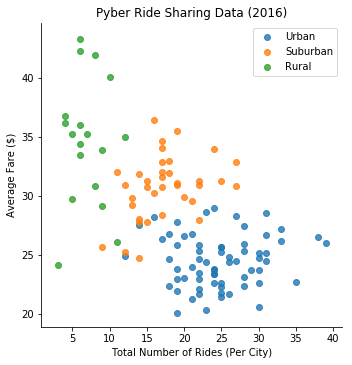

In [5]:
# Build the scatter plots for each city types


# library & dataset

 
# Use the 'hue' argument to provide a factor variable
sns.lmplot( x="Ride Count", y="Mean Fare", 
           data=df, fit_reg=False, hue='type', legend=False)
 
# Move the legend to an empty part of the plot
plt.legend(loc='upper right')

plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.title("Pyber Ride Sharing Data (2016)")

plt.show()

In [34]:
df.head()

rural_df = df[df.type == 'Rural']
suburban_df = df[df.type == 'Suburban']
urban_df = df[df.type == 'Urban']
rural_df.head()

,city,Mean Fare,Ride Count,driver_count,type
4,Bradshawfurt,40.064000,10,7,Rural
17,Garzaport,24.123333,3,7,Rural
20,Harringtonfort,33.470000,6,4,Rural
24,Jessicaport,36.013333,6,1,Rural
33,Lake Jamie,34.358333,6,4,Rural


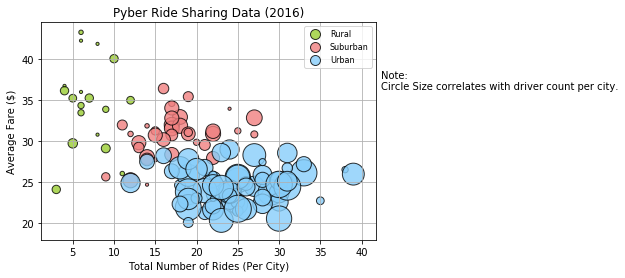

In [93]:
fig, ax = plt.subplots()
colors = ['yellowgreen', 'lightcoral', 'lightskyblue']

rural = ax.scatter(rural_df['Ride Count'], rural_df['Mean Fare'],  s=rural_df['driver_count']*10, 
           c=colors[0], alpha=0.8, linewidth=1, 
           edgecolors="black")
suburban = ax.scatter(suburban_df['Ride Count'], suburban_df['Mean Fare'],  s=suburban_df['driver_count']*10, 
           c=colors[1], alpha=0.8, linewidth=1, 
           edgecolors="black")
urban = ax.scatter(urban_df['Ride Count'], urban_df['Mean Fare'],  s=urban_df['driver_count']*10, 
           c=colors[2], alpha=0.8, linewidth=1, 
           edgecolors="black")


plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.title("Pyber Ride Sharing Data (2016)")

# build legend
lgnd = plt.legend((rural, suburban, urban),
           ('Rural', 'Suburban', 'Urban'),
           scatterpoints=1,
           loc='upper right',
           ncol=1,
           fontsize=8)

# Set marker size for legend
lgnd.legendHandles[0]._sizes = [100]
lgnd.legendHandles[1]._sizes = [100]
lgnd.legendHandles[2]._sizes = [100]

#figtext(.95, .9, "This is text on the side of the figure", rotation='horizantal')

plt.annotate('Note:\nCircle Size correlates with driver count per city.', (0,0), (340, 170), xycoords='axes fraction', textcoords='offset points', va='top')

# Add grid
plt.grid()

plt.show()

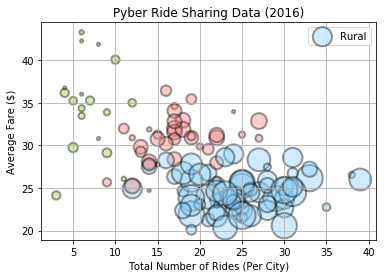

In [23]:
fig, ax = plt.subplots()
colors = {'Rural':'yellowgreen', 'Suburban':'lightcoral', 'Urban':'lightskyblue'}

ax.scatter(df['Ride Count'], df['Mean Fare'],  s=df['driver_count']*10, 
           c=df['type'].apply(lambda x: colors[x]), alpha=0.4, linewidth=2, 
           edgecolors="black")

ax.legend({'Rural':'yellowgreen'})

#, 'Suburban':'lightcoral', 'Urban':'lightskyblue'})

plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.title("Pyber Ride Sharing Data (2016)")


# Add grid
plt.grid()

plt.show()

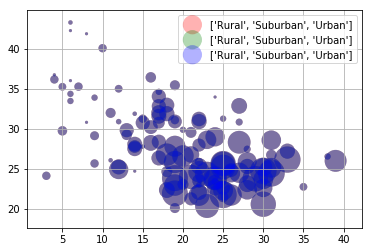

In [21]:
label = ['Rural', 'Suburban', 'Urban']

fig, ax = plt.subplots()
for color in ['red', 'green', 'blue']:
    n = 750
    ax.scatter(df['Ride Count'], df['Mean Fare'], c=color, s=df['driver_count']*10, label=label,
               alpha=0.3, edgecolors='none')

ax.legend()
ax.grid(True)

plt.show()

TypeError: float() argument must be a string or a number, not 'dict'

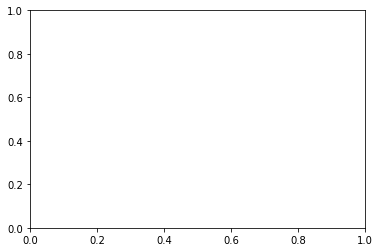

In [7]:
# https://python-graph-gallery.com/272-map-a-color-to-bubble-plot/


#color_df = df.replace(['Urban', 'Suburban', 'Rural'], ["yellowgreen", "lightcoral", "lightskyblue"], inplace=True)

df.plot.scatter('Ride Count', 'Mean Fare', s=df['driver_count']*10, c=colors, alpha=0.4, linewidth=2, edgecolors="black")

plt.legend(loc='upper right')

plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.title("Pyber Ride Sharing Data (2016)")
 
plt.show()

In [8]:


# https://plot.ly/python/bubble-charts/

import plotly.plotly as py
import plotly.graph_objs as go

trace0 = go.Scatter(
    x=df['Ride Count'],
    y=df['Mean Fare'],
    mode='markers',
    marker=dict(
        color=['rgb(93, 164, 214)', 'rgb(255, 144, 14)',
               'rgb(44, 160, 101)', 'rgb(255, 65, 54)'],
        opacity=[0.4],
        size=df['driver_count']*10,
    )
)

bubble_data = [trace0]
py.iplot(bubble_data, filename='Pyber Bubble Chart')

ModuleNotFoundError: No module named 'plotly'

AttributeError: 'str' object has no attribute 'shape'

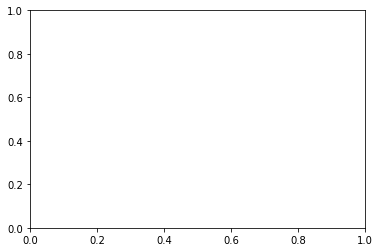

In [10]:
df.plot.scatter('Ride Count', 'Mean Fare', s=df['driver_count']*10, c='type', alpha=0.4, linewidth=2, edgecolors="black")

plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.title("Pyber Ride Sharing Data (2016)")
 
plt.show()

ValueError: c of shape (120,) not acceptable as a color sequence for x with size 120, y with size 120

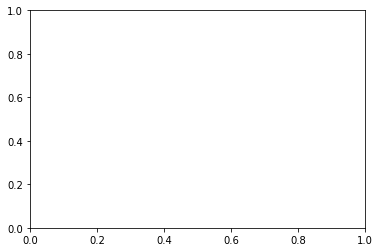

In [11]:
# create data



x = df['Ride Count']
y = df['Mean Fare']
z = df['driver_count']
c = df['type']


# Change color with c and alpha. I map the color to the X axis value.
plt.scatter(x, y, s=z*10, c=c, cmap="Blues", alpha=0.4, edgecolors="grey", linewidth=2)
 
# Add titles (main and on axis)
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.title("Pyber Ride Sharing Data (2016)")
 
plt.show()

In [12]:
## ----> this works!!df.plot(kind='scatter', x='Ride Count', y='Mean Fare', s=df['driver_count']*10,
## --------> this works!!    alpha=0.4, linewidth=2, edgecolors="black")


#df.plot(kind='scatter', x='Ride Count', y='Mean Fare', s=df['driver_count']*10, c='type', cmap="PuOr", 
        #alpha=0.4, edgecolors="black", linewidth=2)



#df.plot(kind='scatter', x='Ride Count', y='Mean Fare', s=df['driver_count']*10,  c='type', cmap='RdYlBu',
       #alpha=0.4, linewidth=2, edgecolors="black")

### ----> this works!! x = df['Ride Count']
### ----> this works!! y = df['Mean Fare']
### ----> this works!! s = df['driver_count']*10
### ----> this works!! c = df['type']

### ----> this works!!plt.scatter(x, y, s, alpha=0.4, linewidth=2, edgecolors="black")

        
        #, c=colors, cmap="Blues", 
        # linewidth=2)
        
        
# Add Titles 


# Incorporate the other graph properties

# Create a legend

# Incorporate a text label regarding circle size

# Save Figure

In [ ]:
# Build the scatter plots for each city types

# Incorporate the other graph properties

# Create a legend

# Incorporate a text label regarding circle size

# Save Figure

In [ ]:
# Show plot
plt.show()

## Total Fares by City Type

In [ ]:
# Calculate Type Percents

type_total_fare = merged_data.groupby('type')['fare'].sum()
total_fare = type_total_fare.sum()
percent_fare = (type_total_fare / total_fare)*100

# input to new df
d2 = {"Percent Fare": percent_fare}
df2 = pd.DataFrame(data=d2)


In [ ]:
# Build Pie Chart

# The colors of each section of the pie chart
colors = ["yellowgreen", "lightcoral", "lightskyblue"]

labels = ['Rural', 'Suburban', 'Urban']

# Tells matplotlib to seperate the "Python" section from the others
explode = (0, 0, 0.1)

plt.pie(df2['Percent Fare'], explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

plt.title("% of Total Fares by City Type")

plt.show()

# Save Figure

plt.savefig("PercentTotalFare.png")

In [ ]:
# Show Figure
plt.show()

## Total Rides by City Type

In [ ]:
# Calculate Ride Percents

# Build Pie Chart

# Save Figure


# Calculate Type Percents

type_total_ride = merged_data.groupby('type')['ride_id'].count()
total_ride = type_total_ride.sum()
percent_ride = (type_total_ride / total_ride)*100

# input to new df
d3 = {"Percent Ride": percent_ride}
df3 = pd.DataFrame(data=d3)

# The colors of each section of the pie chart
#colors = ["yellowgreen", "lightcoral", "lightskyblue"]

#labels = ['Rural', 'Suburban', 'Urban']

# Tells matplotlib to seperate the "Python" section from the others
#explode = (0, 0, 0.1)

plt.pie(df3['Percent Ride'], explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

plt.title("% of Total Ride by City Type")

plt.show()

# Save Figure

plt.savefig("PercentTotalRides.png")

In [ ]:
# Show Figure
plt.show()

## Total Drivers by City Type

In [ ]:
# Calculate Driver Percents

# Build Pie Charts

# Save Figure

# Calculate Type Percents

city_driver_total = df.groupby('type')['driver_count'].sum()
total_driver = city_driver_total.sum()
percent_driver = (city_driver_total / total_driver)*100

# input to new df
d4 = {"Percent Driver": percent_driver}
df4 = pd.DataFrame(data=d4)

# The colors of each section of the pie chart
#colors = ["yellowgreen", "lightcoral", "lightskyblue"]

#labels = ['Rural', 'Suburban', 'Urban']

# Tells matplotlib to seperate the "Python" section from the others
#explode = (0, 0, 0.1)

plt.pie(df4['Percent Driver'], explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

plt.title("% of Total Drivers by City Type")

plt.show()

# Save Figure
plt.savefig("PercentTotalDrivers.png")

In [ ]:
# Show Figure
plt.show()